In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from code.helper import MarkovChain

In [35]:
dfs = []
for year in [2000, 2005, 2010, 2015, 2020]:
    filepath = f"../data/sheb_{year}-{year+4}.csv"
    df = pd.read_csv(filepath)
    dfs.append(df)

df = pd.concat(dfs)
df['day'] = pd.to_datetime(df['day'])
df = df.set_index('day')

In [36]:
df['precip_in'].dtype

dtype('float64')

In [37]:
df['precip_in'] = df['precip_in'].fillna(0.)
df.loc[df['precip_in'] <= 0.001, 'precip_in'] = 0


In [38]:
df['shine_today'] = (df['precip_in'] == 0).astype(int)
df['shine_yesterday'] = (df['precip_in'].shift(1) == 0).astype(int)

In [39]:
df[['shine_today', 'shine_yesterday']].head()

,shine_today,shine_yesterday
day,,
2000-01-01,1,0
2000-01-02,0,1
2000-01-03,0,0
2000-01-04,0,0
2000-01-05,1,0


In [40]:
step_matrix = np.zeros((2, 2))

for j, yester_df in df.groupby(by='shine_yesterday'):
    denom = len(yester_df)
    for i, today_df in yester_df.groupby(by='shine_today'):
        num = len(today_df)
        step_matrix[i, j] = num/denom

In [41]:
mc = MarkovChain(step_matrix)

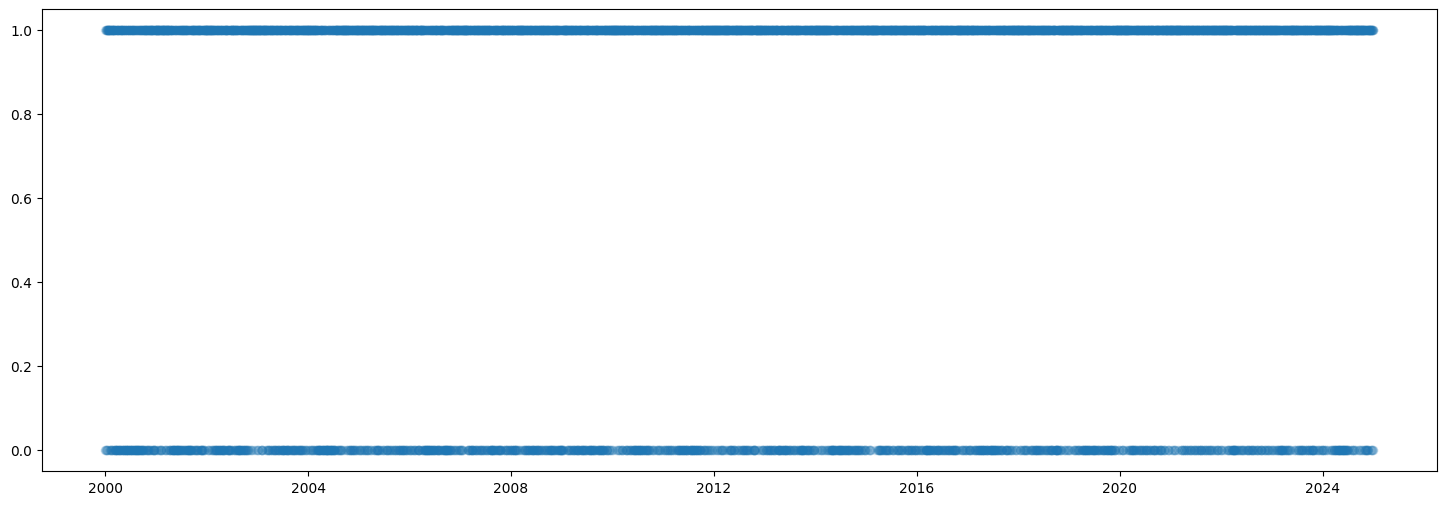

In [44]:
precip = df['shine_today'].values
plt.figure(figsize=(18, 6))
plt.scatter(df.index, precip, alpha=0.1)
plt.show()

In [45]:
len(df)

9132

In [51]:
steps = mc.walk(1, 9132)

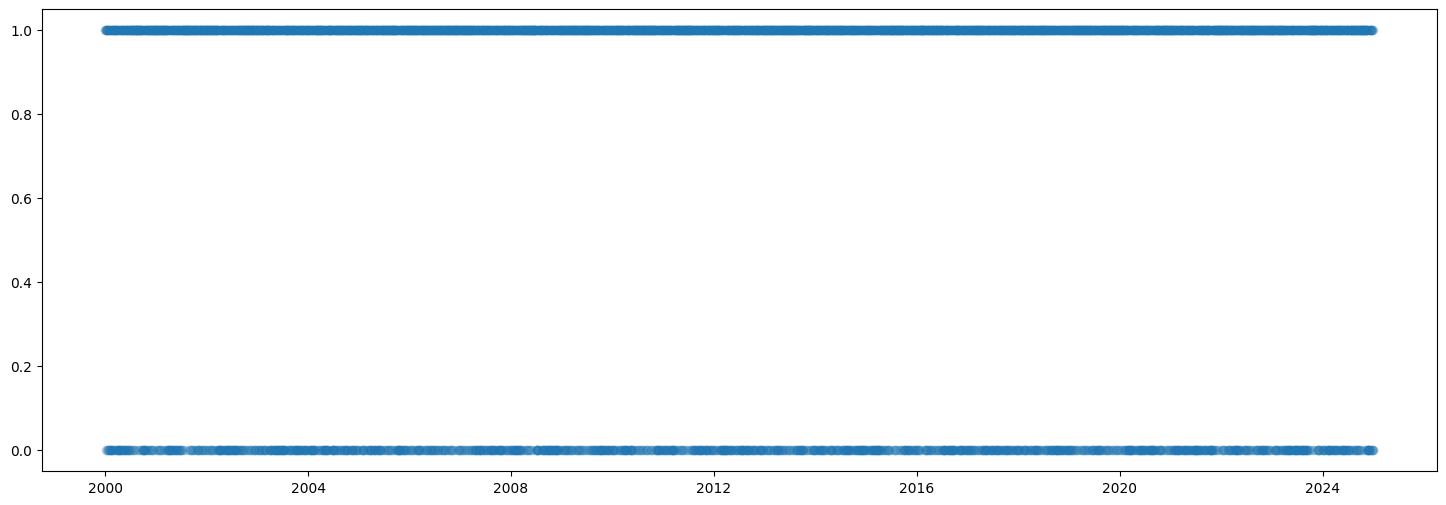

In [56]:
plt.figure(figsize=(18, 6))
dates = pd.date_range(start="2000-01-01", end="2024-12-31")

plt.scatter(dates, steps, alpha=0.1)
plt.show()

In [57]:
mc.steady_state()

array([0.33571633, 0.66428367])